## Libraries

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from tensorflow import keras
from keras.layers import Dense, Flatten, Dropout, BatchNormalization, Conv2D, MaxPooling2D
from keras.datasets import mnist

from sklearn.model_selection import train_test_split

## Database

### Downloads and preparing datasets

In [3]:
import PIL
from PIL import Image

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


### Normalization db

In [5]:
# @title входное значение д.б. в пределах 0 и 1
x_train = x_train / 255
x_test = x_test / 255

In [6]:
# @title приводим к 10 выходным нейронам:
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

### Приведение данных к входным параметрам свётрочного слоя

в keras  на входе сверточного слоя ожидаются данные в следующих форматах:
* (batchs, channels, rows, cols), если data_format='channels_first'
* (batchs, rows, cols, channels), если data_format='channels_last'(по умолч)

т.е.
* размер батч
* кол-во строк/столбцов у карты признаков или входного изображения,
* число каналов. Если это входное изображение, то признак цвета: серое изображение = 1, цветное изображение = 3 канала.

In [7]:
x_train.shape

(60000, 28, 28)

In [ ]:
# @title Добавляем ещё одну ось
# (для размерности канала/признак цветности) для соответствия входных данных в keras свёрточного слоя
x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)
x_train.shape

(60000, 28, 28, 1)

## Structure of NC

Conv2D- сверточный слой:
* 32 кол-во фильтров определяем сами,
* (3,3) - размер ядра
* padding='same' - сохранит параметры ядра в пикселях, путём добавления слоя в 1 пиксель, т.о. выходное значение будет иметь такую же размерность

MaxPooLing2D - слой укрупнения масштаба:
* pool_sizie(2,2) - размер окна
* strides=2 - шаг сканирования по координатам плоскости, перешагиваем 2 px, чтобы окна не пересекались
* padding='valid' - не добавляем элементов по границе изображения
* data_format=None -

In [ ]:
model = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2), strides=2),  # после получили размерность 14*14 (укрупнили)
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2), strides=2),  # после получили размерность 7*7 (укрупнили) и 64 канала/ядра
    Flatten(),  # Flatten вытягивает весь tensor в один вектор, который подаем на полносвязную сеть
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model.summary()
# model.get_config()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 3136)              0         
                                                                 
 dense_20 (Dense)            (None, 128)             

* 320 - весовых коэффициентов получили после первого свёрт.слоя:
- 3*3(размер окна)+1(биос) = 10,  32 фильтра * 10 коэф = 320
* На вход 2-го свёрт.слоя приходит 32 фильтра в каждом фильтре:
(3*3(размер окна)*32 + 1(биос))*64(фильтра) = 18496
* На вход след нейронного слоя с MaxPooling подаётся:
 64 канала * 7 * 7 + 1(bios) = 3 137, слой стоит из 128 нейронов = 401536
* На входе выходного слоя 1290 вес.коэф-тов: 128+1 * 10 = 1290



In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

## Training

In [ ]:
history = model.fit(
    x_train, y_train_cat,
    batch_size=32,
    epochs=5,
    validation_split=0.2
)

Epoch 1/5
1500/1500 [==============================] - 64s 42ms/step - loss: 0.1339 - accuracy: 0.9582 - val_loss: 0.0569 - val_accuracy: 0.9839
Epoch 2/5
1500/1500 [==============================] - 62s 41ms/step - loss: 0.0442 - accuracy: 0.9861 - val_loss: 0.0489 - val_accuracy: 0.9850
Epoch 3/5
1500/1500 [==============================] - 62s 41ms/step - loss: 0.0295 - accuracy: 0.9904 - val_loss: 0.0472 - val_accuracy: 0.9852
Epoch 4/5
1500/1500 [==============================] - 62s 41ms/step - loss: 0.0220 - accuracy: 0.9929 - val_loss: 0.0408 - val_accuracy: 0.9887
Epoch 5/5
1500/1500 [==============================] - 64s 43ms/step - loss: 0.0163 - accuracy: 0.9947 - val_loss: 0.0374 - val_accuracy: 0.9902


In [ ]:
model.evaluate(x_test, y_test_cat)

313/313 [==============================] - 5s 15ms/step - loss: 0.0351 - accuracy: 0.9897


[0.03507592901587486, 0.9897000193595886]

## History

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


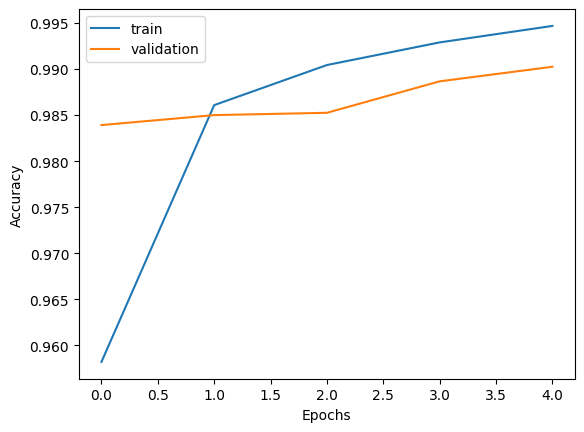

In [ ]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

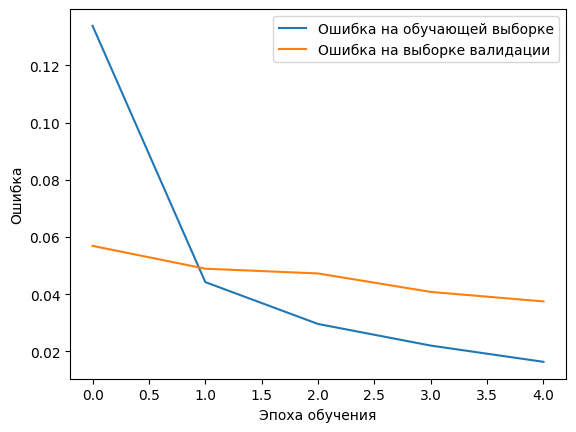

In [ ]:
# @title Посмотрим ОШИБКУ на графике:
plt.plot(history.history['loss'], label='Ошибка на обучающей выборке')
plt.plot(history.history['val_loss'], label='Ошибка на выборке валидации')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()